In [3]:
import json
search_tweets = json.load(open('science_tweets.json'))


In [4]:
len(search_tweets)

1000

In [5]:
retweets = []
for tweet in search_tweets:
    if 'retweeted_status' in tweet:
        retweets.append(tweet)
len(retweets)

511

In [6]:
import networkx as nx

D = nx.DiGraph()

for retweet in retweets:
    retweeted_status = retweet['retweeted_status']
    retweeted_sn = retweeted_status['user']['screen_name']
    retweeter_sn = retweet['user']['screen_name']
    
    # Edge direction: retweeted_sn -> retweeter_sn
    if D.has_edge(retweeted_sn, retweeter_sn):
        D.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else:
        D.add_edge(retweeted_sn, retweeter_sn, weight=1)

In [7]:
max(D.nodes, key=D.out_degree)


'AntonioParis'

In [8]:
from operator import itemgetter

sorted(D.out_degree(), key=itemgetter(1), reverse=True)[:5]

[('AntonioParis', 49),
 ('JaviTannhauser', 15),
 ('illucifer', 11),
 ('maximaxoo', 10),
 ('BetteAStevens', 8)]

In [9]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]


[('AntonioParis', 50),
 ('JaviTannhauser', 15),
 ('illucifer', 11),
 ('maximaxoo', 10),
 ('AgiwaldW', 9)]

In [11]:
nx.is_weakly_connected(D)


False

In [12]:
nx.number_weakly_connected_components(D)


246

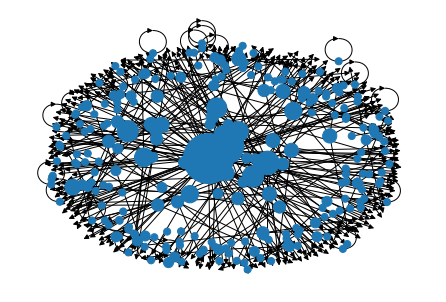

In [13]:
node_sizes = [D.out_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)

In [14]:
import networkx as nx

D = nx.DiGraph()

for tweet in search_tweets:
    tweet_sn = tweet['user']['screen_name']
    for user_mention in tweet['entities']['user_mentions']:
        mentioned_sn = user_mention['screen_name']
        
        my_edge = (tweet_sn, mentioned_sn)
        if D.has_edge(*my_edge):
            D.edges[my_edge]['weight'] += 1
        else:
            D.add_edge(*my_edge, weight=1)

In [15]:
max(D.nodes, key=D.in_degree)


'AntonioParis'